# Precipitation analysis from commercial microwave links and the open source software pycomlink: A heavy rain event in South Germany

This notebook contains an example of application for pycomlink. The Python based open source software pycomlink is intended to provide an intelligible tool for processing Commercial microwave link (CML) data for meteorological and hydrological purposes. The notebook accompanies the manuscript <b>Precipitation analysis from commercial microwave links and the open source software pycomlink: A heavy rain event in South Germany</b> submitted to Monthly Weather Review and contains the code examples described in the paper.

The open source library pycomlink and its source code is published under the MIT license and is freely available at https://bitbucket.org/cchwala/pycomlink. It is also registered in the Python Package Index PyPi (https://pypi.python.org/pypi) and can easily be installed and updated with the Python package administration tool pip (https://pypi.python.org/pypi/pip). The latest documentation of pycomlink is published at http://pycomlink.readthedocs.org.<br>
pycomlink works with Python 2.7 and depends on numpy, scipy, pandas, matplotlib, cartopy and numba. You can install it via pip, but it is recommended that you install the dependecies first. We recommend the usage of the Anaconda Python distribution for all scientific python packages. <br>
The pip command to install pycomlink is the following:<br>
<b>$ pip install pycomlink</b>


After installation we can import the pycomlink module and use the %pylab magic command to plot figures inline the notebook.

In [1]:
%pylab inline
import pycomlink as pycml

Populating the interactive namespace from numpy and matplotlib


The notebook comes with a cmlh5 file containing data from one CML in South Bavaria, Germany. The io functionality of pycomlink allows an easy import of the data. Coding example 1b exemplifies the usage of loading a comlink object from a cmlh5 file (coding example 1a is omitted in this notebook). The reading routine read_from_cmlh5 returns a list of comlink objects, even though there is only one comlink object stored. 

### Coding example 1b

In [53]:
list_of_cmls = pycml.io.read_from_cmlh5('data/cml.h5')

1 CMLs read in


We want to work with the comlink object itself and take it out from the list.

In [54]:
cml = list_of_cmls[0]

A first look to the data of the comlink object, which is stored as pandas dataframe:

In [55]:
cml.data

,rx_channel_1,rx_channel_2,tx_channel_1,tx_channel_2,txrx_channel_1,txrx_channel_2
2015-06-01 00:00:00+00:00,-40.4,-40.4,19.0,19.0,59.4,59.4
2015-06-01 00:01:00+00:00,-40.7,-40.1,19.0,19.0,59.7,59.1
2015-06-01 00:02:00+00:00,-40.4,-40.4,19.0,19.0,59.4,59.4
2015-06-01 00:03:00+00:00,-40.4,-40.4,19.0,19.0,59.4,59.4
2015-06-01 00:04:00+00:00,-40.4,-40.1,19.0,19.0,59.4,59.1
2015-06-01 00:05:00+00:00,-40.4,-40.1,19.0,19.0,59.4,59.1
2015-06-01 00:06:00+00:00,-40.4,-40.4,19.0,19.0,59.4,59.4
2015-06-01 00:07:00+00:00,-40.4,-40.4,19.0,19.0,59.4,59.4
2015-06-01 00:08:00+00:00,-40.4,-40.1,19.0,19.0,59.4,59.1
2015-06-01 00:09:00+00:00,-40.4,-40.1,19.0,19.0,59.4,59.1


We can easily plot the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb460d0>]], dtype=object)

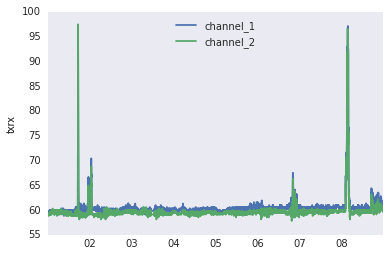

In [57]:
cml.plot()
# If you want to plot the RX (received signal level) and/or the TX (transmitted signal level) values 
# instead of their difference TXRX try:
# cml.plot(['rx','tx'])

As the data is stored as pandas dataframe, all the pandas functionalities as preserved. E.g. we can easily resample the series to a different time resolution by

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e8d8550>]], dtype=object)

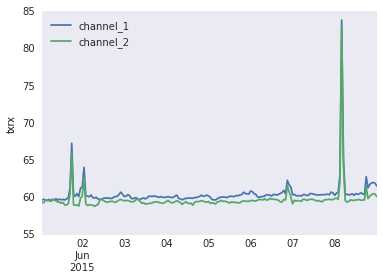

In [56]:
cml.plot(resampling_time='1H') # you can try other periods like 15min, 2h, 1d etc

The CML used in this example is operated by the our industry partner Ericsson Germany. For data security reasons the precise location of the CML towers can not be published. The CML is located approx. 25 km southeast of Munich, Germany, in the municapility of Glonn. The metadata of the comlink object is stored as dictionary.

In [58]:
cml.metadata

{'length_km': nan,
 'link_id': 'cml_id',
 'site_A': {'lat': nan, 'lon': nan},
 'site_B': {'lat': nan, 'lon': nan}}

Further metadata like frequency, polarization, channel bearing and other information, that are important for processing issues, is stored as dictionary in a seperate object attribute:

In [59]:
cml.tx_rx_pairs

{u'channel_1': {'f_GHz': 24.913,
  'name': u'channel_1',
  'pol': 'V',
  'rx': u'rx_channel_1',
  'tx': u'tx_channel_1'},
 u'channel_2': {'f_GHz': 25.920999999999999,
  'name': u'channel_2',
  'pol': 'V',
  'rx': u'rx_channel_2',
  'tx': u'tx_channel_2'}}

To demonstrate the object method <b>info_plot()</b> we define a set of geographic CML tower coordinates (Once again these coordinates don't show the real locations of the CML towers near Glonn).


ID: cml_id
-------------------------------------------------------------
     Site A                       Site B
  L: nan km
 Lat: 47.9                      48.0
 Lon: 11.9                     11.8


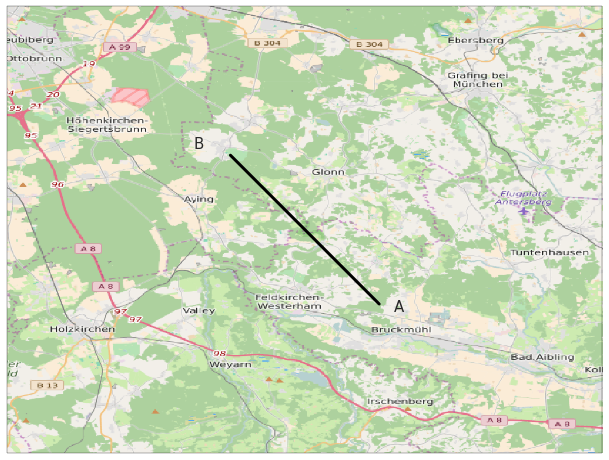

In [60]:
cml.metadata['site_A']['lat'] = 47.90
cml.metadata['site_A']['lon'] = 11.90
cml.metadata['site_B']['lat'] = 48.00
cml.metadata['site_B']['lon'] = 11.80

cml.info_plot()

## Processing of CML data

### Coding example 2a - Wet/dry classification with standard deviation method (Schleiss, 2010)

In [61]:
# Seperate treatment of each channel
windows = [255,205] #Length of roliing windows for both channels
sigmas = [0.34,0.26] #Threshold value for standard deviation within rolling window
for channel,w,s in zip(cml.tx_rx_pairs,windows,sigmas):
    #Get the TXRX series as array
    txrx = cml.data['txrx_'+channel].values
    #Perform wet/dry classification
    cml.data['wet_'+channel],info = pycml.wet_dry.wet_dry_std_dev(txrx,
                                                                  window_length=w,
                                                                  threshold=s)

To get a nice plot and to create the upper part of figure 5 of the manuscript, we first import the plotting module seaborn as well as the dates module of matplotlib:

In [69]:
import seaborn as sns
import matplotlib.dates as mdates
def plot_wet_dry():
    fig, ax = subplots(1,1, figsize=(16,2))
    sns.set_style("dark")
    ax.plot(cml.data['2015-06-06 12:00':'2015-06-08 23:59'].index,cml.data['txrx_channel_1']['2015-06-06 12:00':'2015-06-08 23:59'],color='k')

    ax.set_ylabel(r'TXRX / $dB$')
    ax2 = ax.twinx()
    ax2.fill_between(cml.data['2015-06-06 12:00':'2015-06-08 23:59'].index,0,
                     cml.data['wet_channel_1']['2015-06-06 12:00':'2015-06-08 23:59'],alpha=0.2,color='k')
    ax2.set_yticklabels([])    

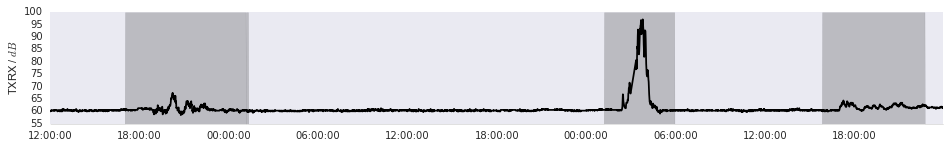

In [70]:
plot_wet_dry()

### Coding example 2b - Wet/dry classification with short-time Fast Fourier method (Chwala,2012)

In [65]:
# Seperate treatment of each channel
divide_frequencies = [0.5*10e-3,1.0*10e-3] #f_divide for each channel
sigmas = [3.5,1.5] #Threshold value for STFT method
for channel,s,f in zip(cml.tx_rx_pairs,sigmas,divide_frequencies):
    #Get the TXRX series as array
    txrx = cml.data['txrx_'+channel].values
    #Calculate 10h period with lowest standard deviation
    t_dry_start,t_dry_stop = pycml.wet_dry.find_lowest_std_dev_period(txrx,window_length=600)
    #Perform wet/dry classification
    cml.data['wet_'+channel],info = pycml.wet_dry.wet_dry_stft(txrx,
                                                               window_length=256,
                                                               threshold=s,
                                                               f_divide=f,
                                                               t_dry_start=t_dry_start,
                                                               t_dry_stop=t_dry_stop,
                                                               mirror=False)

/Users/keis-f/code/pycomlink/pycomlink/wet_dry.py:291: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = np.empty(shape, dtype)
/Users/keis-f/code/pycomlink/pycomlink/wet_dry.py:260: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  P_dry_mean = np.nanmean(Pxx_extended[:, t_dry_start:t_dry_stop], axis=1)
/Users/keis-f/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


The wet columns of cml.data get overwritten by repeating the wet/dry classification. The lower part of figure 5 of the manuscript is created by:

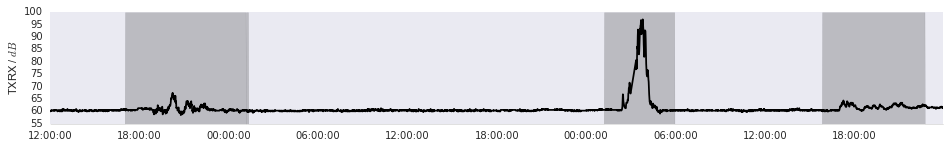

In [71]:
plot_wet_dry()

### Coding example 2c

Wet/dry classification with internal methods for equal treatment of all CML channels.

[]

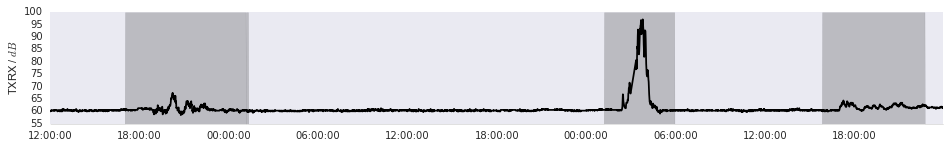

In [68]:
cml.do_wet_dry_classification(method='std_dev',window_length=150,threshold=0.3)
plot_wet_dry()

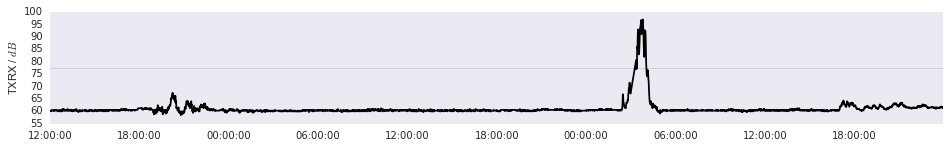

In [76]:
cml.do_wet_dry_classification(method='stft',window_length=256,
                                            threshold=1,
                                            f_divide=1*10e-3,
                                            dry_window_length=600)
plot_wet_dry()

Coding example 2c is a nice example of the usefulness of a wet/dry classification calibration. By using the "standard values" for Fast Fourier method, as derived in the study no precipitating periods would be classified. But by using the lower value for the frequency division, as it is obtained by the performance analysis, the wet periods are classified correctly.

### Coding example 3

As we want to use the result of coding example 2b in the further course of this notebook, we first repeat it at this point to make sure the wet/dry information comes from this approach.

In [77]:
# Seperate treatment of each channel
divide_frequencies = [0.5*10e-3,1.5*10e-3] #f_divide for each channel
sigmas = [3.5,1.0] #Threshold value for STFT method
for channel,s,f in zip(cml.tx_rx_pairs,sigmas,divide_frequencies):
    #Get the TXRX series as array
    txrx = cml.data['txrx_'+channel].values
    #Calculate 10h period with lowest standard deviation
    t_dry_start,t_dry_stop = pycml.wet_dry.find_lowest_std_dev_period(txrx,window_length=600)
    #Perform wet/dry classification
    cml.data['wet_'+channel],info = pycml.wet_dry.wet_dry_stft(txrx,
                                                               window_length=256,
                                                               threshold=s,
                                                               f_divide=f,
                                                               t_dry_start=t_dry_start,
                                                               t_dry_stop=t_dry_stop,
                                                               mirror=False)

Afterwards we can do the baseline calculation and the wet antenna adjust. You can change the baseline determination method or parameters of the wet antenna adjustment and check how the results shifts. 

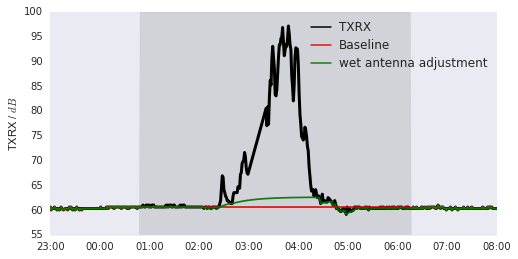

In [82]:
# Baseline determination
cml.do_baseline_determination(method='constant')
# Save the baseline for plotting purpose
cml.data['baseline_orig'] = cml.data['baseline_channel_1']
# Wet antenna adjustement
cml.do_wet_antenna_baseline_adjust(waa_max=2,
                                   delta_t=1.9,
                                   tau=60)
####################
# Here comes the plot
fig, ax = subplots(1,1, figsize=(8,4))
ax.plot(cml.data['2015-06-07 23:00':'2015-06-08 08:00'].index,
        cml.data['txrx_channel_1']['2015-06-07 23:00':'2015-06-08 08:00'],
        color='k',
        label='TXRX',
        lw=3)
ax.plot(cml.data['2015-06-07 23:00':'2015-06-08 08:00'].index,
        cml.data['baseline_orig']['2015-06-07 23:00':'2015-06-08 08:00'],
        color='r',
        label='Baseline',
       alpha=0.9)
ax.plot(cml.data['2015-06-07 23:00':'2015-06-08 08:00'].index,
        cml.data['baseline_channel_1']['2015-06-07 23:00':'2015-06-08 08:00'],
        color='g',
        label='wet antenna adjustment',
       alpha=0.9)
legend=plt.legend(shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
ax2 = ax.twinx()
ax2.fill_between(cml.data['2015-06-07 23:00':'2015-06-08 08:00'].index,0,
                 cml.data['wet_channel_1']['2015-06-07 23:00':'2015-06-08 08:00'],alpha=0.1,color='k')
ax2.set_yticklabels([])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator())
ax.set_ylabel(r'TXRX / $dB$')

### Coding example 4

In [83]:
cml.calc_A()

The method calc_A() calculates the attenuation A [db km^-1]. To be able to deduce the line integrated rain rate, information about the CML length is necessary. The announced length in this notebook isn't th real length of the Glonn CML. The resulting figure might slightly differ from figure 7 because of that. For the manuscript the real coordinates and length have been used.

In [84]:
cml.metadata['length_km'] = 4.0

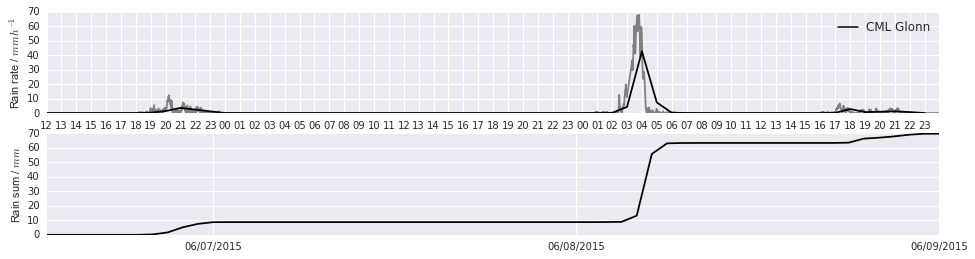

In [87]:
cml.calc_R_from_A()


# Here comes the plot
fig, ax = subplots(2,1, figsize=(16,4))
sns.set_style("darkgrid")
ax[0].plot(cml.data['2015-06-06 12:00':'2015-06-08 23:59'].index,
           cml.data['R_channel_1']['2015-06-06 12:00':'2015-06-08 23:59'],
           color='grey',label='_nolegend_')
ax[0].plot(cml.data.resample('60min',label='right').mean()['2015-06-06 12:00':'2015-06-08 23:59'].index,
           cml.data['R_channel_1'].resample('60min',label='right').mean()['2015-06-06 12:00':'2015-06-08 23:59'],
           color='k',label='CML Glonn')
legend=ax[0].legend(shadow=True)
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
ax[0].set_ylabel(r'Rain rate / $mm h^{-1}$')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax[0].xaxis.set_major_locator(mdates.HourLocator())


ax[1].plot(cml.data['2015-06-06 12:00':'2015-06-08 23:59'].resample('60min',label='right').mean().index,
           cml.data['R_channel_1'].resample('60min',label='right').mean()['2015-06-06 12:00':'2015-06-08 23:59'].cumsum(),
           color='k',label='_nolegend_')

ax[1].set_ylabel(r'Rain sum / $mm$')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax[1].xaxis.set_major_locator(mdates.DayLocator())